# Reconstructing redundant cross sections

In [1]:
import sandy

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

Reconstruction rules for redundant cross sections are available in Appendix B of the [ENDF-6 manual](https://www.oecd-nea.org/dbdata/data/manual-endf/endf102.pdf).

## H-1 case 

In [3]:
pendf = sandy.get_endf6_file("jeff_33", "xs", 10010).get_pendf()
xs = sandy.Xs.from_endf6(pendf)

INFO:  Zero or no temperature was requested, NJOY processing will stop after RECONR.
    If you want to process 0K cross sections use `temperature=0.1`.
    


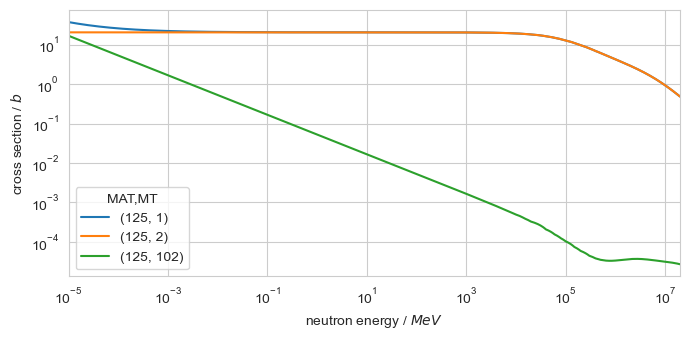

In [4]:
fig, ax = plt.subplots(figsize=(7, 3.5), dpi=100)
xs.data.plot(ax=ax, logx=True, logy=True)
ax.set_xlim([1e-5, 2e7])
ax.set_xlabel("neutron energy / $MeV$")
ax.set_ylabel("cross section / $b$")
fig.tight_layout()

In [5]:
xssum = xs.reconstruct_sums(drop=False)

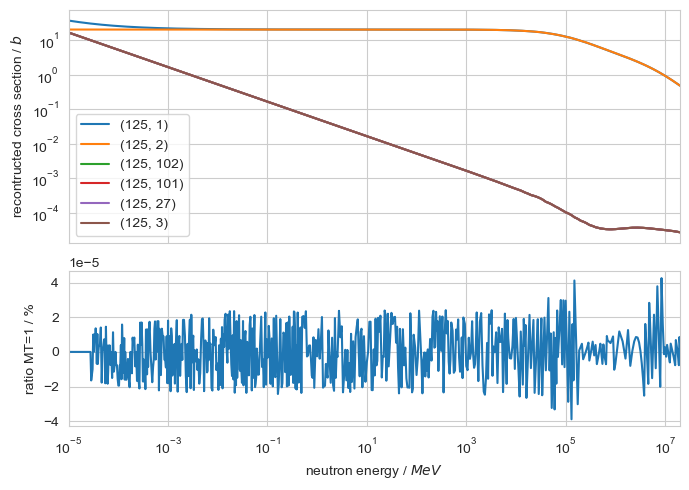

In [6]:
fig, axs = plt.subplots(2, 1, figsize=(7, 5), dpi=100, sharex=True, gridspec_kw={'height_ratios': [3, 2]})

ax = axs[0]
xssum.data.plot(ax=ax, logx=True, logy=True)
ax.legend()
ax.set_ylabel("recontructed cross section / $b$")

ax = axs[1]
(xssum.data[(125, 1)] / xs.data[(125, 1)] - 1).multiply(100).plot(ax=ax, logx=True)

ax.set_xlim([1e-5, 2e7])
ax.set_xlabel("neutron energy / $MeV$")
ax.set_ylabel("ratio MT=1 / %")
fig.tight_layout()

We introduce a 100% perturbation on MT=102 to see if it reflects on the reconstruction of redundant xs. 

In [7]:
xssum_mod = sandy.Xs(xs.data)
xssum_mod.data[(125, 102)] *= 2
xssum_mod = xssum_mod.reconstruct_sums(drop=False)

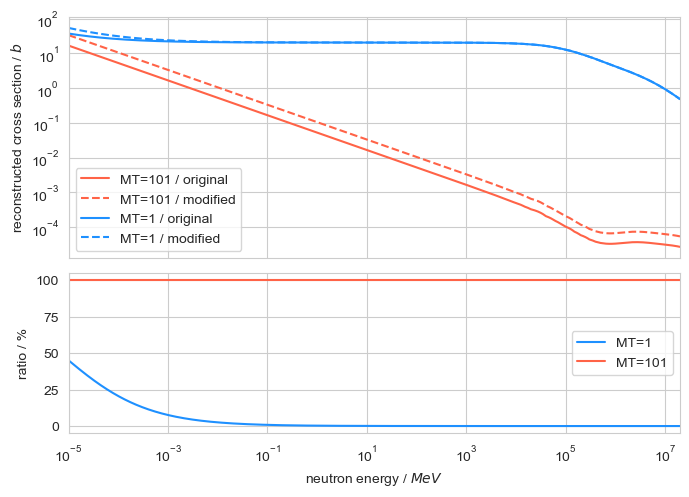

In [8]:
fig, axs = plt.subplots(2, 1, figsize=(7, 5), dpi=100, sharex=True, gridspec_kw={'height_ratios': [3, 2]})

ax = axs[0]
xssum.data[(125, 102)].plot(ax=ax, logx=True, logy=True, color="tomato", linestyle="-", label="MT=101 / original")
xssum_mod.data[(125, 102)].plot(ax=ax, logx=True, logy=True, color="tomato", linestyle="--", label="MT=101 / modified")
xssum.data[(125, 1)].plot(ax=ax, logx=True, logy=True, color="dodgerblue", linestyle="-", label="MT=1 / original")
xssum_mod.data[(125, 1)].plot(ax=ax, logx=True, logy=True, color="dodgerblue", linestyle="--", label="MT=1 / modified")
ax.legend()
ax.set_ylabel("reconstructed cross section / $b$")

ax = axs[1]
(xssum_mod.data[(125, 1)] / xssum.data[(125, 1)] - 1).multiply(100).plot(ax=ax, logx=True, label="MT=1", color="dodgerblue")
(xssum_mod.data[(125, 101)] / xssum.data[(125, 101)] - 1).multiply(100).plot(ax=ax, logx=True, label="MT=101", color="tomato")
ax.set_ylabel("ratio / %")
ax.legend()

ax.set_xlim([1e-5, 2e7])
ax.set_xlabel("neutron energy / $MeV$")
fig.tight_layout()

# Am-241 case

This is a more complex case also containing neutorn-induced fission and inelastic scattering cross sections.

In [9]:
pendf = sandy.get_endf6_file("jeff_33", "xs", 952410).get_pendf(err=0.1)
xs = sandy.Xs.from_endf6(pendf)

INFO:  Zero or no temperature was requested, NJOY processing will stop after RECONR.
    If you want to process 0K cross sections use `temperature=0.1`.
    


In [10]:
xssum = xs.reconstruct_sums(drop=False)

Numerical fluctuations appear in MT=1 and MT=4 because they were reconstructed.
Not in MT=102 and MT=51, which were not changed.

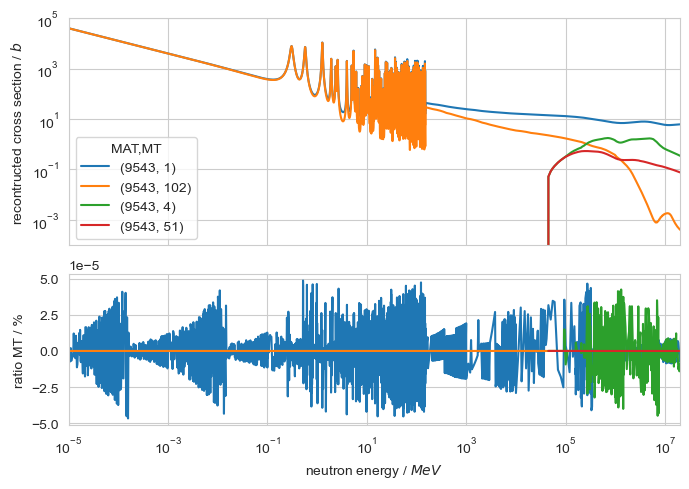

In [11]:
fig, axs = plt.subplots(2, 1, figsize=(7, 5), dpi=100, sharex=True, gridspec_kw={'height_ratios': [3, 2]})

ax = axs[0]
xssum.data[[(9543, 1), (9543, 102), (9543, 4), (9543, 51)]].plot(ax=ax, logx=True, logy=True)
ax.set_ylabel("recontructed cross section / $b$")

ax = axs[1]
(xssum.data[(9543, 1)] / xs.data[(9543, 1)] - 1).multiply(100).plot(ax=ax, logx=True)
(xssum.data[(9543, 102)] / xs.data[(9543, 102)] - 1).multiply(100).plot(ax=ax, logx=True)
(xssum.data[(9543, 4)] / xs.data[(9543, 4)] - 1).multiply(100).plot(ax=ax, logx=True)
(xssum.data[(9543, 51)] / xs.data[(9543, 51)] - 1).multiply(100).plot(ax=ax, logx=True)

ax.set_xlim([1e-5, 2e7])
ax.set_xlabel("neutron energy / $MeV$")
ax.set_ylabel("ratio MT / %")
fig.tight_layout()

Plotting all reconstructed cross sections.

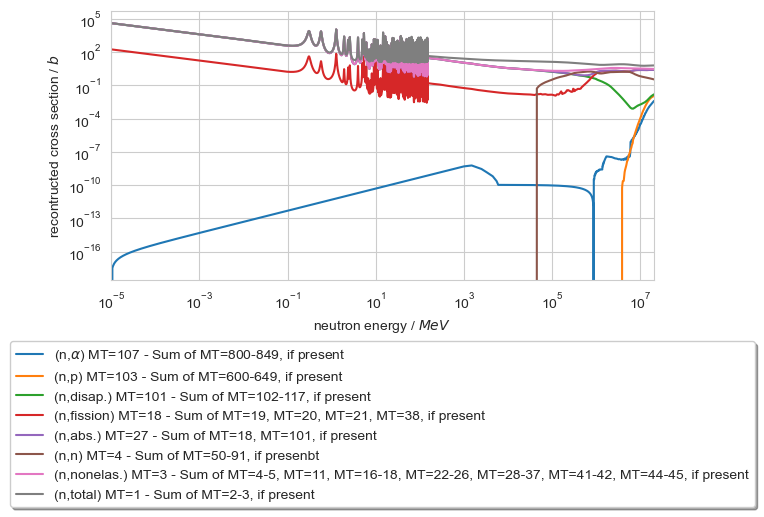

In [12]:
fig, ax = plt.subplots(figsize=(7, 3.5), dpi=100)

xssum.data[(9543, 107)].plot(ax=ax, label="(n,$\\alpha$) MT=107 - Sum of MT=800-849, if present")
xssum.data[(9543, 103)].plot(ax=ax, label="(n,p) MT=103 - Sum of MT=600-649, if present")
xssum.data[(9543, 101)].plot(ax=ax, label="(n,disap.) MT=101 - Sum of MT=102-117, if present")
xssum.data[(9543, 18)].plot(ax=ax, label="(n,fission) MT=18 - Sum of MT=19, MT=20, MT=21, MT=38, if present")
xssum.data[(9543, 27)].plot(ax=ax, label="(n,abs.) MT=27 - Sum of MT=18, MT=101, if present")
xssum.data[(9543, 4)].plot(ax=ax, label="(n,n) MT=4 - Sum of MT=50-91, if presenbt")
xssum.data[(9543, 3)].plot(ax=ax, label="(n,nonelas.) MT=3 - Sum of MT=4-5, MT=11, MT=16-18, MT=22-26, MT=28-37, MT=41-42, MT=44-45, if present")
xssum.data[(9543, 1)].plot(ax=ax, label="(n,total) MT=1 - Sum of MT=2-3, if present")

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True)
ax.set_xlim([1e-5, 2e7])
ax.set_xlabel("neutron energy / $MeV$")
ax.set_ylabel("recontructed cross section / $b$")
ax.set_xscale("log")
ax.set_yscale("log");